In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
warnings.filterwarnings('ignore')

df = pd.read_csv("shuttle-unsupervised-ad.csv", names=["a",'b','c','d', 'e', 'f' , 'g', 'h', 'i', 'j'])
#df.cols = ["ä",'b','c','d', 'e', 'f' , 'g', 'h', 'i']

df.head()

,a,b,c,d,e,f,g,h,i,j
0,108.0,3.0,109.0,0.0,72.0,7.0,1.0,36.0,36.0,o
1,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
2,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
3,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
4,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o


In [27]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,a,b,c,d,e,f,g,h,i,j
0,45.0,0.0,79.0,0.0,44.0,-1.0,34.0,35.0,0.0,n
1,42.0,0.0,87.0,-7.0,42.0,0.0,45.0,46.0,2.0,n
2,43.0,-2.0,87.0,0.0,42.0,-7.0,44.0,46.0,2.0,n
3,37.0,0.0,83.0,8.0,36.0,5.0,45.0,46.0,2.0,n
4,55.0,5.0,86.0,4.0,54.0,0.0,31.0,32.0,2.0,n


In [28]:
df.j.unique()

array(['n', 'o'], dtype=object)

In [29]:
df.replace('o', 0, inplace=True)
df.replace('n', 1, inplace= True)
df.head()

,a,b,c,d,e,f,g,h,i,j
0,45.0,0.0,79.0,0.0,44.0,-1.0,34.0,35.0,0.0,1
1,42.0,0.0,87.0,-7.0,42.0,0.0,45.0,46.0,2.0,1
2,43.0,-2.0,87.0,0.0,42.0,-7.0,44.0,46.0,2.0,1
3,37.0,0.0,83.0,8.0,36.0,5.0,45.0,46.0,2.0,1
4,55.0,5.0,86.0,4.0,54.0,0.0,31.0,32.0,2.0,1


In [30]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df= pd.DataFrame(x_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.187500,0.695092,0.453125,0.507015,0.371795,0.457870,0.458015,0.622793,0.572347,1.0
1,0.156250,0.695092,0.515625,0.506114,0.368590,0.457906,0.541985,0.640449,0.575563,1.0
2,0.166667,0.694781,0.515625,0.507015,0.368590,0.457656,0.534351,0.640449,0.575563,1.0
3,0.104167,0.695092,0.484375,0.508045,0.358974,0.458085,0.541985,0.640449,0.575563,1.0
4,0.291667,0.695868,0.507812,0.507530,0.387821,0.457906,0.435115,0.617978,0.575563,1.0


In [31]:
df.rename(columns={ df.columns[9]: 'a'}, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,a
0,0.187500,0.695092,0.453125,0.507015,0.371795,0.457870,0.458015,0.622793,0.572347,1.0
1,0.156250,0.695092,0.515625,0.506114,0.368590,0.457906,0.541985,0.640449,0.575563,1.0
2,0.166667,0.694781,0.515625,0.507015,0.368590,0.457656,0.534351,0.640449,0.575563,1.0
3,0.104167,0.695092,0.484375,0.508045,0.358974,0.458085,0.541985,0.640449,0.575563,1.0
4,0.291667,0.695868,0.507812,0.507530,0.387821,0.457906,0.435115,0.617978,0.575563,1.0


In [32]:
df2 = df.iloc[ :15488, : ]
df3 = df.iloc[15488:30976, : ]
df4 = df.iloc[30976: , : ]

df2.head()

,0,1,2,3,4,5,6,7,8,a
0,0.187500,0.695092,0.453125,0.507015,0.371795,0.457870,0.458015,0.622793,0.572347,1.0
1,0.156250,0.695092,0.515625,0.506114,0.368590,0.457906,0.541985,0.640449,0.575563,1.0
2,0.166667,0.694781,0.515625,0.507015,0.368590,0.457656,0.534351,0.640449,0.575563,1.0
3,0.104167,0.695092,0.484375,0.508045,0.358974,0.458085,0.541985,0.640449,0.575563,1.0
4,0.291667,0.695868,0.507812,0.507530,0.387821,0.457906,0.435115,0.617978,0.575563,1.0


In [33]:
df3.head()

,0,1,2,3,4,5,6,7,8,a
15488,0.104167,0.695092,0.437500,0.507015,0.314103,0.458442,0.503817,0.677368,0.620579,1.0
15489,0.302083,0.695868,0.593750,0.507015,0.387821,0.458228,0.503817,0.634029,0.575563,1.0
15490,0.291667,0.695092,0.468750,0.507015,0.391026,0.459014,0.389313,0.605136,0.572347,1.0
15491,0.104167,0.695092,0.445312,0.507015,0.326923,0.458871,0.511450,0.667737,0.607717,1.0
15492,0.302083,0.695402,0.468750,0.507015,0.391026,0.457942,0.381679,0.605136,0.572347,1.0


In [34]:
df4.head()

,0,1,2,3,4,5,6,7,8,a
30976,0.322917,0.695558,0.468750,0.506500,0.391026,0.457906,0.381679,0.605136,0.572347,1.0
30977,0.177083,0.695247,0.507812,0.507272,0.371795,0.458049,0.526718,0.634029,0.572347,1.0
30978,0.197917,0.694470,0.484375,0.507015,0.371795,0.456833,0.480916,0.629213,0.575563,1.0
30979,0.104167,0.695092,0.453125,0.507015,0.339744,0.458514,0.519084,0.654896,0.594855,1.0
30980,0.229167,0.695092,0.523438,0.507015,0.375000,0.457799,0.503817,0.634029,0.575563,1.0


In [35]:
df2.shape

(15488, 10)

In [36]:
df3.shape

(15488, 10)

In [37]:
df4.shape

(15488, 10)

In [38]:
pd.value_counts(df2['a'], sort = True)

1.0    15183
0.0      305
Name: a, dtype: int64

In [39]:
pd.value_counts(df3['a'], sort = True)

1.0    15199
0.0      289
Name: a, dtype: int64

In [40]:
pd.value_counts(df4['a'], sort = True)

1.0    15204
0.0      284
Name: a, dtype: int64

In [41]:
normal_df2 = df2[df2.a == 0] 
anamolous_df2 = df2[df2.a == 1]
y=df2['a']
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2, y, test_size=0.2)
print (X_train1.shape, y_train1.shape)
print (X_test1.shape, y_test1.shape)
X_train1.shape

(12390, 10) (12390,)
(3098, 10) (3098,)


(12390, 10)

In [42]:
nb_epoch = 50
batch_size = 128
input_dim = X_train1.shape[1] 
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) 
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_edge1.h5",save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir=r'C:\Users\Shubham\work\logs1',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train1, X_train1,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test1, X_test1),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 12390 samples, validate on 3098 samples
Epoch 1/50
12390/12390 [==============================] - 0s 24us/step - loss: 0.2043 - accuracy: 7.2639e-04 - val_loss: 0.1523 - val_accuracy: 0.0052
Epoch 2/50
12390/12390 [==============================] - 0s 13us/step - loss: 0.0656 - accuracy: 0.8428 - val_loss: 0.0484 - val_accuracy: 0.9781
Epoch 3/50
12390/12390 [==============================] - 0s 12us/step - loss: 0.0453 - accuracy: 0.9808 - val_loss: 0.0447 - val_accuracy: 0.9781
Epoch 4/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.0443 - accuracy: 0.9808 - val_loss: 0.0445 - val_accuracy: 0.9781
Epoch 5/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.0442 - accuracy: 0.9808 - val_loss: 0.0444 - val_accuracy: 0.9781
Epoch 6/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.0441 - accuracy: 0.9808 - val_loss: 0.0443 - val_accuracy: 0.9781
Epoch 7/50
12390/12390 [==============================] - 0s 11us

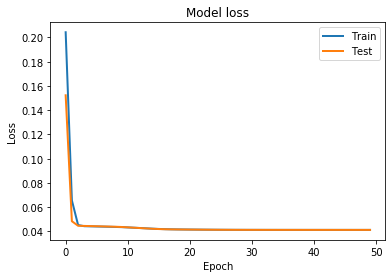

In [43]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [44]:
normal_df3 = df3[df3.a == 0] 
anamolous_df3 = df3[df3.a == 1]
y=df3['a']
X_train2, X_test2, y_train2, y_test2 = train_test_split(df3, y, test_size=0.2)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)
X_train2.shape

(12390, 10) (12390,)
(3098, 10) (3098,)


(12390, 10)

In [45]:
nb_epoch = 50
batch_size = 128
input_dim = X_train2.shape[1] 
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) 
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_edge2.h5",save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir=r'C:\Users\Shubham\work\logs2',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train2, X_train2,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test2, X_test2),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 12390 samples, validate on 3098 samples
Epoch 1/50
12390/12390 [==============================] - 0s 25us/step - loss: 0.2024 - accuracy: 0.0091 - val_loss: 0.1697 - val_accuracy: 0.0081
Epoch 2/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.1697 - accuracy: 0.0093 - val_loss: 0.1696 - val_accuracy: 0.0081
Epoch 3/50
12390/12390 [==============================] - 0s 12us/step - loss: 0.1697 - accuracy: 0.0093 - val_loss: 0.1695 - val_accuracy: 0.0081
Epoch 4/50
12390/12390 [==============================] - 0s 12us/step - loss: 0.1696 - accuracy: 0.0093 - val_loss: 0.1694 - val_accuracy: 0.0081
Epoch 5/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.1695 - accuracy: 0.0093 - val_loss: 0.1693 - val_accuracy: 0.0081
Epoch 6/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.1694 - accuracy: 0.0093 - val_loss: 0.1693 - val_accuracy: 0.0081
Epoch 7/50
12390/12390 [==============================] - 0s 11us/ste

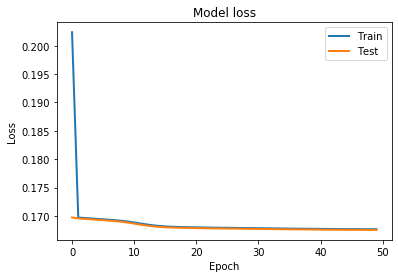

In [46]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [47]:
normal_df4 = df4[df4.a == 0] 
anamolous_df4 = df4[df4.a == 1]
y=df4['a']
X_train3, X_test3, y_train3, y_test3 = train_test_split(df4, y, test_size=0.2)
print (X_train3.shape, y_train3.shape)
print (X_test3.shape, y_test3.shape)
X_train3.shape

(12390, 10) (12390,)
(3098, 10) (3098,)


(12390, 10)

In [48]:
nb_epoch = 50
batch_size = 128
input_dim = X_train3.shape[1] 
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) 
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_edge3.h5",save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir=r'C:\Users\Shubham\work\logs3',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train3, X_train3,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test3, X_test3),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 12390 samples, validate on 3098 samples
Epoch 1/50
12390/12390 [==============================] - 0s 27us/step - loss: 0.2186 - accuracy: 0.0073 - val_loss: 0.2128 - val_accuracy: 0.0097
Epoch 2/50
12390/12390 [==============================] - 0s 12us/step - loss: 0.2128 - accuracy: 0.0075 - val_loss: 0.2126 - val_accuracy: 0.0036
Epoch 3/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.2125 - accuracy: 0.0039 - val_loss: 0.2122 - val_accuracy: 0.0029
Epoch 4/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.1379 - accuracy: 0.6806 - val_loss: 0.1151 - val_accuracy: 0.9822
Epoch 5/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.1147 - accuracy: 0.9875 - val_loss: 0.1142 - val_accuracy: 0.9900
Epoch 6/50
12390/12390 [==============================] - 0s 11us/step - loss: 0.1143 - accuracy: 0.9902 - val_loss: 0.1141 - val_accuracy: 0.9900
Epoch 7/50
12390/12390 [==============================] - 0s 13us/ste

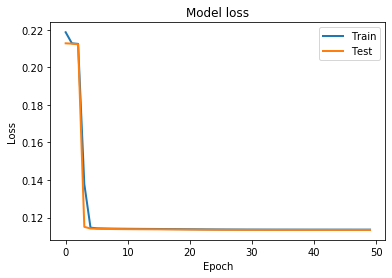

In [49]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()